An organization bases its commercial processes on consultative selling (opportunities). The organization has a year's history of information on which opportunities were won and lost; from this information they want to predict which opportunities are more likely to be closed.

In [1]:
import os
import pandas as pd

In [2]:
file = 'oportunidad.csv'

In [3]:
data = pd.read_csv(file)
print(data.shape)
data.head()

(31823, 17)


,Opportunity Number,Supplies Subgroup,Supplies Group,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,Lat,Lon,Country_Code,Country
0,NaN,Car Electronics,Car Electronics,Won,5,94,90,469000,1,1,0,None,6,-16.130262,-63.808594,1,Bolivia
1,NaN,Garage & Car Care,Car Accessories,Won,4,4,4,5000,3,2,0,Unknown,1,-16.130262,-63.808594,1,Bolivia
2,NaN,Shelters & RV,Performance & Non-auto,Loss,4,71,71,200000,3,1,0,Unknown,5,-16.130262,-63.808594,1,Bolivia
3,NaN,Motorcycle Parts,Performance & Non-auto,Loss,2,46,46,120000,5,1,0,Unknown,5,-16.130262,-63.808594,1,Bolivia
4,NaN,Replacement Parts,Car Accessories,Won,3,6,6,12000,1,1,0,Unknown,2,-16.130262,-63.808594,1,Bolivia


In [4]:
data.nunique()

Opportunity Number                         31346
Supplies Subgroup                             11
Supplies Group                                 4
Opportunity Result                             2
Sales Stage Change Count                      19
Total Days Identified Through Closing        134
Total Days Identified Through Qualified      134
Opportunity Amount USD                      4888
Client Size By Revenue                         5
Client Size By Employee Count                  5
Revenue From Client Past Two Years             5
Competitor Type                                3
Deal Size Category                             7
Lat                                           15
Lon                                           15
Country_Code                                   7
Country                                        7
dtype: int64

In [5]:
y = data[['Opportunity Result']]
y_encode = y['Opportunity Result']=='Won'
y_encode = y_encode.astype(int)
y_encode

0        1
1        1
2        0
3        0
4        1
        ..
31818    1
31819    0
31820    1
31821    0
31822    1
Name: Opportunity Result, Length: 31823, dtype: int64

In [6]:
data

,Opportunity Number,Supplies Subgroup,Supplies Group,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,Lat,Lon,Country_Code,Country
0,NaN,Car Electronics,Car Electronics,Won,5,94,90,469000,1,1,0,None,6,-16.130262,-63.808594,1,Bolivia
1,NaN,Garage & Car Care,Car Accessories,Won,4,4,4,5000,3,2,0,Unknown,1,-16.130262,-63.808594,1,Bolivia
2,NaN,Shelters & RV,Performance & Non-auto,Loss,4,71,71,200000,3,1,0,Unknown,5,-16.130262,-63.808594,1,Bolivia
3,NaN,Motorcycle Parts,Performance & Non-auto,Loss,2,46,46,120000,5,1,0,Unknown,5,-16.130262,-63.808594,1,Bolivia
4,NaN,Replacement Parts,Car Accessories,Won,3,6,6,12000,1,1,0,Unknown,2,-16.130262,-63.808594,1,Bolivia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31818,9966870.0,Batteries & Accessories,Car Accessories,Won,3,5,5,20000,1,1,3,Unknown,2,7.318882,-65.170898,7,Venezuela
31819,9977169.0,Motorcycle Parts,Performance & Non-auto,Loss,5,3,3,50000,1,1,0,Unknown,4,5.309766,-66.401367,7,Venezuela
31820,9977719.0,Garage & Car Care,Car Accessories,Won,2,4,4,15000,1,1,1,Unknown,2,7.318882,-65.170898,7,Venezuela
31821,9991099.0,Exterior Accessories,Car Accessories,Loss,2,3,3,30000,1,1,0,Unknown,3,7.318882,-65.170898,7,Venezuela


In [7]:
print(data.isnull().sum().sort_values(ascending=False)/len(data)*100)
data.isnull().sum().sort_values(ascending=False)

Opportunity Number                         0.967853
Client Size By Employee Count              0.000000
Country_Code                               0.000000
Lon                                        0.000000
Lat                                        0.000000
Deal Size Category                         0.000000
Competitor Type                            0.000000
Revenue From Client Past Two Years         0.000000
Client Size By Revenue                     0.000000
Supplies Subgroup                          0.000000
Opportunity Amount USD                     0.000000
Total Days Identified Through Qualified    0.000000
Total Days Identified Through Closing      0.000000
Sales Stage Change Count                   0.000000
Opportunity Result                         0.000000
Supplies Group                             0.000000
Country                                    0.000000
dtype: float64


Opportunity Number                         308
Client Size By Employee Count                0
Country_Code                                 0
Lon                                          0
Lat                                          0
Deal Size Category                           0
Competitor Type                              0
Revenue From Client Past Two Years           0
Client Size By Revenue                       0
Supplies Subgroup                            0
Opportunity Amount USD                       0
Total Days Identified Through Qualified      0
Total Days Identified Through Closing        0
Sales Stage Change Count                     0
Opportunity Result                           0
Supplies Group                               0
Country                                      0
dtype: int64

In [8]:
data['Supplies Subgroup'].unique()

array(['Car Electronics', 'Garage & Car Care', 'Shelters & RV',
       'Motorcycle Parts', 'Replacement Parts', 'Batteries & Accessories',
       'Exterior Accessories', 'Performance Parts',
       'Interior Accessories', 'Towing & Hitches', 'Tires & Wheels'],
      dtype=object)

In [9]:
data['Supplies Group'].unique()

array(['Car Electronics', 'Car Accessories', 'Performance & Non-auto',
       'Tires & Wheels'], dtype=object)

In [10]:
data['Competitor Type'].value_counts()

Unknown    23119
Known       4925
None        3779
Name: Competitor Type, dtype: int64

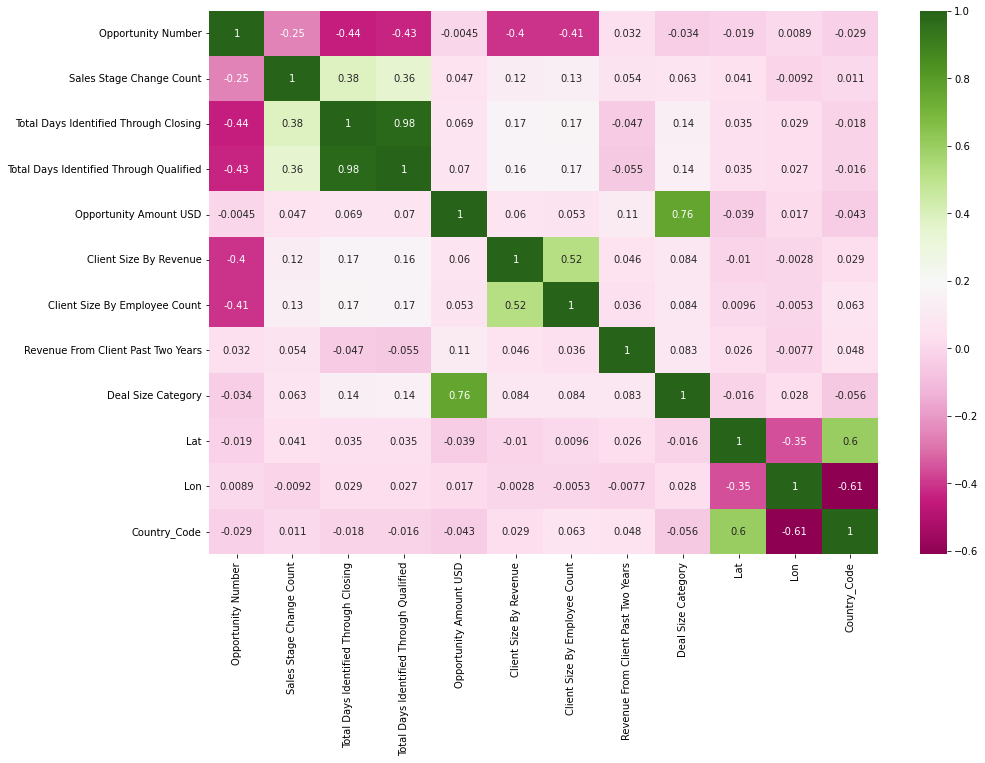

In [11]:
from matplotlib.pyplot import subplots
from seaborn import heatmap
fig = subplots(1,1,figsize=(15,10))
corr = data.corr()
heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,
        cmap= "PiYG");

In [12]:
data.columns

Index(['Opportunity Number', 'Supplies Subgroup', 'Supplies Group',
       'Opportunity Result', 'Sales Stage Change Count',
       'Total Days Identified Through Closing',
       'Total Days Identified Through Qualified', 'Opportunity Amount USD',
       'Client Size By Revenue', 'Client Size By Employee Count',
       'Revenue From Client Past Two Years', 'Competitor Type',
       'Deal Size Category', 'Lat', 'Lon', 'Country_Code', 'Country'],
      dtype='object')

In [13]:
X = data[['Supplies Subgroup','Sales Stage Change Count','Total Days Identified Through Closing',
         'Opportunity Amount USD','Client Size By Revenue', 'Client Size By Employee Count',
         'Revenue From Client Past Two Years','Competitor Type','Deal Size Category','Country']]
X

,Supplies Subgroup,Sales Stage Change Count,Total Days Identified Through Closing,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,Country
0,Car Electronics,5,94,469000,1,1,0,None,6,Bolivia
1,Garage & Car Care,4,4,5000,3,2,0,Unknown,1,Bolivia
2,Shelters & RV,4,71,200000,3,1,0,Unknown,5,Bolivia
3,Motorcycle Parts,2,46,120000,5,1,0,Unknown,5,Bolivia
4,Replacement Parts,3,6,12000,1,1,0,Unknown,2,Bolivia
...,...,...,...,...,...,...,...,...,...,...
31818,Batteries & Accessories,3,5,20000,1,1,3,Unknown,2,Venezuela
31819,Motorcycle Parts,5,3,50000,1,1,0,Unknown,4,Venezuela
31820,Garage & Car Care,2,4,15000,1,1,1,Unknown,2,Venezuela
31821,Exterior Accessories,2,3,30000,1,1,0,Unknown,3,Venezuela


In [14]:
X.dtypes

Supplies Subgroup                        object
Sales Stage Change Count                  int64
Total Days Identified Through Closing     int64
Opportunity Amount USD                    int64
Client Size By Revenue                    int64
Client Size By Employee Count             int64
Revenue From Client Past Two Years        int64
Competitor Type                          object
Deal Size Category                        int64
Country                                  object
dtype: object

In [15]:
from sklearn.preprocessing import OneHotEncoder
X_OHE = data[['Supplies Subgroup','Competitor Type','Country']]
ohe = OneHotEncoder(sparse = False)
ohe2 = ohe.fit_transform(X_OHE)
# ohe.categories_
temp = X_OHE.index
temp2 = {'Batteries & Accessories':ohe2.T[0],'Car Electronics':ohe2.T[1],'Exterior Accessories':ohe2.T[2]
         ,'Garage & Car Care':ohe2.T[3],'Interior Accessories':ohe2.T[4],'Motorcycle Parts':ohe2.T[5]
         ,'Performance Parts':ohe2.T[6],'Replacement Parts':ohe2.T[7],'Shelters & RV':ohe2.T[8]
         ,'Tires & Wheels':ohe2.T[9],'Towing & Hitches':ohe2.T[10],'Known':ohe2.T[11],'None':ohe2.T[12]
         ,'Unknown':ohe2.T[13],'Bolivia':ohe2.T[14],'Brasil':ohe2.T[15],'Chile':ohe2.T[16],'Colombia':ohe2.T[17]
         ,'Ecuador':ohe2.T[18],'Peru':ohe2.T[19],'Venezuela':ohe2.T[20]}
X_OHE2 = pd.DataFrame(data=temp2).set_index(temp)
X_OHE2 = X_OHE2.astype(int)
X_OHE2

,Batteries & Accessories,Car Electronics,Exterior Accessories,Garage & Car Care,Interior Accessories,Motorcycle Parts,Performance Parts,Replacement Parts,Shelters & RV,Tires & Wheels,...,Known,None,Unknown,Bolivia,Brasil,Chile,Colombia,Ecuador,Peru,Venezuela
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31818,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31819,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31820,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31821,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
X.columns

Index(['Supplies Subgroup', 'Sales Stage Change Count',
       'Total Days Identified Through Closing', 'Opportunity Amount USD',
       'Client Size By Revenue', 'Client Size By Employee Count',
       'Revenue From Client Past Two Years', 'Competitor Type',
       'Deal Size Category', 'Country'],
      dtype='object')

In [17]:
X2 = X.drop(columns=['Supplies Subgroup','Competitor Type','Country'])
X2 = X2.join(X_OHE2)
X2

,Sales Stage Change Count,Total Days Identified Through Closing,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Deal Size Category,Batteries & Accessories,Car Electronics,Exterior Accessories,...,Known,None,Unknown,Bolivia,Brasil,Chile,Colombia,Ecuador,Peru,Venezuela
0,5,94,469000,1,1,0,6,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,4,4,5000,3,2,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,4,71,200000,3,1,0,5,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,2,46,120000,5,1,0,5,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,3,6,12000,1,1,0,2,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31818,3,5,20000,1,1,3,2,1,0,0,...,0,0,1,0,0,0,0,0,0,1
31819,5,3,50000,1,1,0,4,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31820,2,4,15000,1,1,1,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31821,2,3,30000,1,1,0,3,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [18]:
X2.dtypes

Sales Stage Change Count                 int64
Total Days Identified Through Closing    int64
Opportunity Amount USD                   int64
Client Size By Revenue                   int64
Client Size By Employee Count            int64
Revenue From Client Past Two Years       int64
Deal Size Category                       int64
Batteries & Accessories                  int64
Car Electronics                          int64
Exterior Accessories                     int64
Garage & Car Care                        int64
Interior Accessories                     int64
Motorcycle Parts                         int64
Performance Parts                        int64
Replacement Parts                        int64
Shelters & RV                            int64
Tires & Wheels                           int64
Towing & Hitches                         int64
Known                                    int64
None                                     int64
Unknown                                  int64
Bolivia      

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [20]:
model = LogisticRegression()
cv_results = cross_validate(model, X2, y_encode,cv=10
                            ,scoring=['accuracy'])
cv_results['test_accuracy'].mean()

0.7800015817057661

In [21]:
from sklearn.linear_model import SGDClassifier 
model2 = SGDClassifier()
cv_results2 = cross_validate(model2, X2, y_encode,cv=10
                            ,scoring=['accuracy'])
cv_results2['test_accuracy'].mean()

0.6625296668564319

In [22]:
print(data['Lat'].nunique())
data['Lat'].value_counts()

15


-24.367114    6197
-1.230374     3765
-16.130262    3298
-9.275622     2921
-5.965754     2827
-11.523088    2821
-11.005904    1300
-23.079732    1295
-7.536764     1290
 5.309766     1058
 4.390229     1049
 7.318882     1047
 7.928675     1018
 4.696879      982
 6.839170      955
Name: Lat, dtype: int64

In [23]:
print(data['Lon'].nunique())
data['Lon'].value_counts()

15


-68.730469    6197
-78.750000    3765
-63.808594    3298
-75.585938    2921
-79.453125    2827
-73.125000    2821
-47.109375    1300
-48.867188    1295
-57.304687    1290
-66.401367    1058
-74.003906    1049
-65.170898    1047
-67.500000    1018
-77.124023     982
-74.179688     955
Name: Lon, dtype: int64

In [24]:
# data[['Lat','Country']].groupby('Country').count()
temp = data[['Lat','Country']]
temp[temp['Country']=='Colombia'].nunique()

Lat        3
Country    1
dtype: int64

In [25]:
X3 = data[['Supplies Subgroup','Sales Stage Change Count','Total Days Identified Through Closing',
         'Opportunity Amount USD','Client Size By Revenue', 'Client Size By Employee Count',
         'Revenue From Client Past Two Years','Competitor Type','Deal Size Category','Lat']]
X3

,Supplies Subgroup,Sales Stage Change Count,Total Days Identified Through Closing,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,Lat
0,Car Electronics,5,94,469000,1,1,0,None,6,-16.130262
1,Garage & Car Care,4,4,5000,3,2,0,Unknown,1,-16.130262
2,Shelters & RV,4,71,200000,3,1,0,Unknown,5,-16.130262
3,Motorcycle Parts,2,46,120000,5,1,0,Unknown,5,-16.130262
4,Replacement Parts,3,6,12000,1,1,0,Unknown,2,-16.130262
...,...,...,...,...,...,...,...,...,...,...
31818,Batteries & Accessories,3,5,20000,1,1,3,Unknown,2,7.318882
31819,Motorcycle Parts,5,3,50000,1,1,0,Unknown,4,5.309766
31820,Garage & Car Care,2,4,15000,1,1,1,Unknown,2,7.318882
31821,Exterior Accessories,2,3,30000,1,1,0,Unknown,3,7.318882


In [26]:
X3.dtypes

Supplies Subgroup                         object
Sales Stage Change Count                   int64
Total Days Identified Through Closing      int64
Opportunity Amount USD                     int64
Client Size By Revenue                     int64
Client Size By Employee Count              int64
Revenue From Client Past Two Years         int64
Competitor Type                           object
Deal Size Category                         int64
Lat                                      float64
dtype: object

In [27]:
from sklearn.preprocessing import OneHotEncoder
X_OHE3 = data[['Supplies Subgroup','Competitor Type','Lat']]
ohe3 = OneHotEncoder(sparse = False)
ohe4 = ohe3.fit_transform(X_OHE3)
ohe3.categories_

[array(['Batteries & Accessories', 'Car Electronics',
        'Exterior Accessories', 'Garage & Car Care',
        'Interior Accessories', 'Motorcycle Parts', 'Performance Parts',
        'Replacement Parts', 'Shelters & RV', 'Tires & Wheels',
        'Towing & Hitches'], dtype=object),
 array(['Known', 'None', 'Unknown'], dtype=object),
 array([-24.367114, -23.079732, -16.130262, -11.523088, -11.005904,
         -9.275622,  -7.536764,  -5.965754,  -1.230374,   4.390229,
          4.696879,   5.309766,   6.83917 ,   7.318882,   7.928675])]

In [28]:
temp = X_OHE3.index
temp2 = {'Batteries & Accessories':ohe4.T[0],'Car Electronics':ohe4.T[1],'Exterior Accessories':ohe4.T[2]
         ,'Garage & Car Care':ohe4.T[3],'Interior Accessories':ohe4.T[4],'Motorcycle Parts':ohe4.T[5]
         ,'Performance Parts':ohe4.T[6],'Replacement Parts':ohe4.T[7],'Shelters & RV':ohe4.T[8]
         ,'Tires & Wheels':ohe4.T[9],'Towing & Hitches':ohe4.T[10],'Known':ohe4.T[11],'None':ohe4.T[12]
         ,'Unknown':ohe4.T[13],
         
         
         '-24.367114':ohe4.T[14],'-23.079732':ohe4.T[15],'-16.130262':ohe4.T[16],'-11.523088':ohe4.T[17]
         ,'-11.005904':ohe4.T[18],'-9.275622':ohe4.T[19],'-7.536764':ohe4.T[20],'-5.965754':ohe4.T[21]
         ,'-1.230374':ohe4.T[22],'4.390229':ohe4.T[23],'4.696879':ohe4.T[24],'5.309766':ohe4.T[25]
         ,'6.83917':ohe4.T[26],'7.318882':ohe4.T[27],'7.928675':ohe4.T[28]}
X_OHE4 = pd.DataFrame(data=temp2).set_index(temp)
X_OHE4 = X_OHE4.astype(int)
X_OHE4

,Batteries & Accessories,Car Electronics,Exterior Accessories,Garage & Car Care,Interior Accessories,Motorcycle Parts,Performance Parts,Replacement Parts,Shelters & RV,Tires & Wheels,...,-9.275622,-7.536764,-5.965754,-1.230374,4.390229,4.696879,5.309766,6.83917,7.318882,7.928675
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31818,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31819,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31820,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31821,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
X4 = X3.drop(columns=['Supplies Subgroup','Competitor Type','Lat'])
X4 = X4.join(X_OHE4)
X4

,Sales Stage Change Count,Total Days Identified Through Closing,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Deal Size Category,Batteries & Accessories,Car Electronics,Exterior Accessories,...,-9.275622,-7.536764,-5.965754,-1.230374,4.390229,4.696879,5.309766,6.83917,7.318882,7.928675
0,5,94,469000,1,1,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,5000,3,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,71,200000,3,1,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,46,120000,5,1,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,6,12000,1,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31818,3,5,20000,1,1,3,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
31819,5,3,50000,1,1,0,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31820,2,4,15000,1,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31821,2,3,30000,1,1,0,3,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [30]:
X4.dtypes

Sales Stage Change Count                 int64
Total Days Identified Through Closing    int64
Opportunity Amount USD                   int64
Client Size By Revenue                   int64
Client Size By Employee Count            int64
Revenue From Client Past Two Years       int64
Deal Size Category                       int64
Batteries & Accessories                  int64
Car Electronics                          int64
Exterior Accessories                     int64
Garage & Car Care                        int64
Interior Accessories                     int64
Motorcycle Parts                         int64
Performance Parts                        int64
Replacement Parts                        int64
Shelters & RV                            int64
Tires & Wheels                           int64
Towing & Hitches                         int64
Known                                    int64
None                                     int64
Unknown                                  int64
-24.367114   

In [31]:
model3 = LogisticRegression()
cv_results = cross_validate(model3, X4, y_encode,cv=10
                            ,scoring=['accuracy'])
cv_results['test_accuracy'].mean()

0.7801587057105107

In [32]:
y.value_counts()

Opportunity Result
Loss                  24577
Won                    7246
dtype: int64

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
cv_results = cross_validate(clf, X4, y_encode,cv=10
                            ,scoring=['accuracy'])
cv_results['test_accuracy'].mean()

0.7613661060398451

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
cv_results = cross_validate(clf, X4, y_encode,cv=10
                            ,scoring=['accuracy'])
cv_results['test_accuracy'].mean()

0.7743771762030096

In [35]:
model = LogisticRegression()
cv_results = cross_validate(model, X4, y_encode,cv=10
                            ,scoring=['accuracy'], return_estimator=True)
cv_results['test_accuracy'].mean()

0.7801587057105107

In [36]:
cv_results

{'fit_time': array([0.11753702, 0.08626604, 0.20171094, 0.11738491, 0.08971906,
        0.08631802, 0.15671396, 0.08342314, 0.2161448 , 0.12175226]),
 'score_time': array([0.00270891, 0.00232291, 0.00519204, 0.00216222, 0.00288892,
        0.00186491, 0.00340796, 0.00225472, 0.0029161 , 0.00466394]),
 'estimator': [LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression()],
 'test_accuracy': array([0.77222746, 0.77222746, 0.80552937, 0.77215588, 0.77215588,
        0.77215588, 0.78724073, 0.77247014, 0.80295412, 0.77247014])}

In [37]:
best = cv_results['test_accuracy'].argmax()
best_est = cv_results['estimator'][best]
best_est.coef_

array([[ 4.66861537e-01, -8.11480135e-02,  3.98401853e-06,
        -5.61484117e-02, -5.41690837e-02,  5.39416639e-01,
        -5.83292701e-01, -1.81493811e-02,  7.05393528e-04,
         1.50974985e-02,  1.17232537e-02, -3.04931277e-02,
        -1.60452741e-02, -9.13425674e-03,  7.63466342e-03,
        -1.79541538e-02, -4.88293436e-03, -2.72651189e-02,
         5.83565653e-03,  1.85989123e-02, -1.13198006e-01,
        -6.89434443e-02,  1.47392535e-02, -3.17590248e-02,
         2.95150476e-03,  9.96594894e-03,  2.39030301e-04,
         8.08754567e-03,  5.30750896e-03, -1.34966765e-02,
        -6.06485863e-03, -2.63706968e-03,  3.30138720e-04,
        -4.38426228e-03, -4.12293464e-03,  1.02390235e-03]])

In [38]:
X4.columns

Index(['Sales Stage Change Count', 'Total Days Identified Through Closing',
       'Opportunity Amount USD', 'Client Size By Revenue',
       'Client Size By Employee Count', 'Revenue From Client Past Two Years',
       'Deal Size Category', 'Batteries & Accessories', 'Car Electronics',
       'Exterior Accessories', 'Garage & Car Care', 'Interior Accessories',
       'Motorcycle Parts', 'Performance Parts', 'Replacement Parts',
       'Shelters & RV', 'Tires & Wheels', 'Towing & Hitches', 'Known', 'None',
       'Unknown', '-24.367114', '-23.079732', '-16.130262', '-11.523088',
       '-11.005904', '-9.275622', '-7.536764', '-5.965754', '-1.230374',
       '4.390229', '4.696879', '5.309766', '6.83917', '7.318882', '7.928675'],
      dtype='object')

In [39]:
X4.max()

Sales Stage Change Count                      20
Total Days Identified Through Closing        192
Opportunity Amount USD                   1000000
Client Size By Revenue                         5
Client Size By Employee Count                  5
Revenue From Client Past Two Years             4
Deal Size Category                             7
Batteries & Accessories                        1
Car Electronics                                1
Exterior Accessories                           1
Garage & Car Care                              1
Interior Accessories                           1
Motorcycle Parts                               1
Performance Parts                              1
Replacement Parts                              1
Shelters & RV                                  1
Tires & Wheels                                 1
Towing & Hitches                               1
Known                                          1
None                                           1
Unknown             

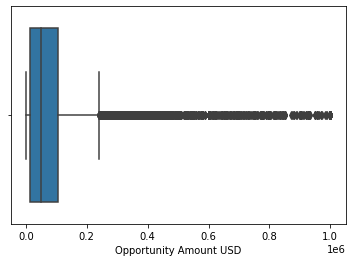

In [40]:
from seaborn import kdeplot,boxplot
boxplot(x=X4['Opportunity Amount USD']);

,0
count,31823.000000
mean,0.091564
std,0.132125
min,0.000000
25%,0.015000
50%,0.049418
75%,0.105000
max,1.000000


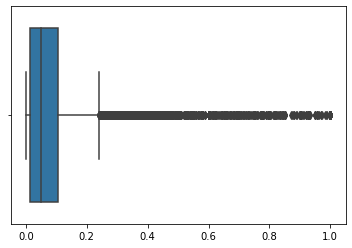

In [41]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X4[['Opportunity Amount USD']])
temp = transformer.transform(X4[['Opportunity Amount USD']])
boxplot(x=temp);
pd.DataFrame(temp).describe()

In [42]:
X4['Opportunity Amount USD'] = temp

In [43]:
X4.max()

Sales Stage Change Count                  20.0
Total Days Identified Through Closing    192.0
Opportunity Amount USD                     1.0
Client Size By Revenue                     5.0
Client Size By Employee Count              5.0
Revenue From Client Past Two Years         4.0
Deal Size Category                         7.0
Batteries & Accessories                    1.0
Car Electronics                            1.0
Exterior Accessories                       1.0
Garage & Car Care                          1.0
Interior Accessories                       1.0
Motorcycle Parts                           1.0
Performance Parts                          1.0
Replacement Parts                          1.0
Shelters & RV                              1.0
Tires & Wheels                             1.0
Towing & Hitches                           1.0
Known                                      1.0
None                                       1.0
Unknown                                    1.0
-24.367114   

In [44]:
model = LogisticRegression(max_iter=400)
cv_results = cross_validate(model, X4, y_encode,cv=10
                            ,scoring=['accuracy'], return_estimator=True)
cv_results['test_accuracy'].mean()

0.7918801327685004

In [45]:
transformer = MinMaxScaler().fit(X4[['Sales Stage Change Count','Total Days Identified Through Closing',
                                    'Client Size By Revenue', 'Client Size By Employee Count', 
                                     'Revenue From Client Past Two Years','Deal Size Category']])
temp = transformer.transform(X4[['Sales Stage Change Count','Total Days Identified Through Closing',
                                    'Client Size By Revenue', 'Client Size By Employee Count', 
                                     'Revenue From Client Past Two Years','Deal Size Category']])
(X4[['Sales Stage Change Count','Total Days Identified Through Closing',
                                    'Client Size By Revenue', 'Client Size By Employee Count', 
                                     'Revenue From Client Past Two Years','Deal Size Category']])=temp

In [46]:
pd.DataFrame(temp)

,0,1,2,3,4,5
0,0.210526,0.489583,0.0,0.00,0.00,0.833333
1,0.157895,0.020833,0.5,0.25,0.00,0.000000
2,0.157895,0.369792,0.5,0.00,0.00,0.666667
3,0.052632,0.239583,1.0,0.00,0.00,0.666667
4,0.105263,0.031250,0.0,0.00,0.00,0.166667
...,...,...,...,...,...,...
31818,0.105263,0.026042,0.0,0.00,0.75,0.166667
31819,0.210526,0.015625,0.0,0.00,0.00,0.500000
31820,0.052632,0.020833,0.0,0.00,0.25,0.166667
31821,0.052632,0.015625,0.0,0.00,0.00,0.333333


In [47]:
X4.describe()

,Sales Stage Change Count,Total Days Identified Through Closing,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Deal Size Category,Batteries & Accessories,Car Electronics,Exterior Accessories,...,-9.275622,-7.536764,-5.965754,-1.230374,4.390229,4.696879,5.309766,6.83917,7.318882,7.928675
count,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,...,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000,31823.000000
mean,0.103120,0.086889,0.091564,0.155493,0.151973,0.076046,0.406786,0.118782,0.003771,0.175251,...,0.091789,0.040537,0.088835,0.118311,0.032964,0.030858,0.033246,0.030010,0.032901,0.031989
std,0.078734,0.086538,0.132125,0.309850,0.303753,0.233548,0.275388,0.323537,0.061292,0.380187,...,0.288732,0.197217,0.284510,0.322981,0.178544,0.172936,0.179282,0.170617,0.178380,0.175975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.052632,0.020833,0.015000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.105263,0.062500,0.049418,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.105263,0.125000,0.105000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
model = LogisticRegression(max_iter=400)
cv_results = cross_validate(model, X4, y_encode,cv=10
                            ,scoring=['accuracy'], return_estimator=True)
cv_results['test_accuracy'].mean()

0.7914403652496281

In [49]:
best = cv_results['test_accuracy'].argmax()
best_est = cv_results['estimator'][best]
best_est.coef_

array([[ 8.51291160e+00, -1.54105674e+01,  2.50322879e+00,
         8.00866657e-02,  1.25742818e-02,  2.59671860e+00,
        -2.56382694e+00, -6.65846080e-02,  3.91021117e-01,
         2.29486660e-01,  3.15446047e-01, -3.21919608e-01,
         2.48037290e-01, -1.07399654e-01,  9.80896032e-02,
        -1.53397198e-02, -3.50540625e-01, -4.23436982e-01,
        -1.01052422e-01,  1.75929687e-01, -7.80177443e-02,
        -3.21196224e-02,  7.02693023e-02, -1.77579584e-01,
         1.00329913e-01,  5.99531722e-03,  4.66241646e-02,
        -8.91668903e-02,  1.22760443e-01, -9.75106624e-02,
        -1.76170809e-02,  6.26354323e-02,  0.00000000e+00,
         2.23878892e-03,  0.00000000e+00,  0.00000000e+00]])

In [50]:
y_encode.value_counts()

0    24577
1     7246
Name: Opportunity Result, dtype: int64

In [51]:
w = {0:24577, 1:7246}
model = LogisticRegression(max_iter=400,class_weight=w)
cv_results = cross_validate(model, X4, y_encode,cv=10
                            ,scoring=['accuracy'], return_estimator=True)
cv_results['test_accuracy'].mean()

0.7817935595547765

In [52]:
import numpy as np
crange = np.arange(0.5, 20.0, 0.5)
hyperparam_grid = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                   ,"penalty": ["l1", "l2"]
                   ,"C": crange
                   ,"fit_intercept": [True, False]  }

In [53]:
# from sklearn.model_selection import GridSearchCV
# model = LogisticRegression(max_iter=400)
# grid = GridSearchCV(model,hyperparam_grid,scoring="accuracy", cv=10, n_jobs=-1, refit=True)
# grid.fit(X4,y_encode)
# print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.7923200977537606 with param: {'C': 0.5, 'fit_intercept': False, 'penalty': 'l1', 'solver': 'saga'}

In [54]:
model = LogisticRegression(max_iter=400,C=0.5,fit_intercept=False,penalty='l1',solver='saga')
cv_results = cross_validate(model, X4, y_encode,cv=10
                            ,scoring=['accuracy','precision','recall'], return_estimator=True)
print(f"Accuracy : {cv_results['test_accuracy'].mean()}")
print(f"Precision :{cv_results['test_precision'].mean()}")
print(f"Recall :{cv_results['test_recall'].mean()}")

Accuracy : 0.7922572540758543
Precision :0.6291992460541408
Recall :0.27732577633835015


In [55]:
best = cv_results['test_accuracy'].argmax()
best_est = cv_results['estimator'][best]
best_est.coef_

array([[ 9.44495557e+00, -1.74260365e+01,  2.55243844e+00,
         8.88889354e-02,  1.60077750e-02,  2.63508725e+00,
        -2.59623495e+00, -2.18051845e-01,  1.49489474e-01,
         7.73948630e-02,  1.58322744e-01, -4.77809184e-01,
         9.24829315e-02, -2.34290750e-01, -5.57664615e-02,
        -1.62371976e-01, -4.32764031e-01, -5.70975974e-01,
        -5.59875688e-01, -2.94155155e-01, -5.41513415e-01,
        -8.01555969e-02,  1.85128471e-02, -2.18504494e-01,
         5.57883342e-02, -2.07192450e-02,  0.00000000e+00,
        -1.17789168e-01,  7.47971264e-02, -1.41389468e-01,
        -3.52007712e-02,  9.22602306e-03,  0.00000000e+00,
        -1.98956647e-02,  0.00000000e+00,  0.00000000e+00]])

In [56]:
coeficients = pd.DataFrame(best_est.coef_).T
# coeficients[0].sort_values()
coeficients[abs(coeficients[0])>0.5]

,0
0,9.444956
1,-17.426036
2,2.552438
5,2.635087
6,-2.596235
17,-0.570976
18,-0.559876
20,-0.541513


In [57]:
X4.columns

Index(['Sales Stage Change Count', 'Total Days Identified Through Closing',
       'Opportunity Amount USD', 'Client Size By Revenue',
       'Client Size By Employee Count', 'Revenue From Client Past Two Years',
       'Deal Size Category', 'Batteries & Accessories', 'Car Electronics',
       'Exterior Accessories', 'Garage & Car Care', 'Interior Accessories',
       'Motorcycle Parts', 'Performance Parts', 'Replacement Parts',
       'Shelters & RV', 'Tires & Wheels', 'Towing & Hitches', 'Known', 'None',
       'Unknown', '-24.367114', '-23.079732', '-16.130262', '-11.523088',
       '-11.005904', '-9.275622', '-7.536764', '-5.965754', '-1.230374',
       '4.390229', '4.696879', '5.309766', '6.83917', '7.318882', '7.928675'],
      dtype='object')

In [58]:
X5=X4[[X4.columns[0],X4.columns[1],X4.columns[2],X4.columns[5]
       ,X4.columns[6],X4.columns[17],X4.columns[18],X4.columns[20]]]
X5

,Sales Stage Change Count,Total Days Identified Through Closing,Opportunity Amount USD,Revenue From Client Past Two Years,Deal Size Category,Towing & Hitches,Known,Unknown
0,0.210526,0.489583,0.469,0.00,0.833333,0,0,0
1,0.157895,0.020833,0.005,0.00,0.000000,0,0,1
2,0.157895,0.369792,0.200,0.00,0.666667,0,0,1
3,0.052632,0.239583,0.120,0.00,0.666667,0,0,1
4,0.105263,0.031250,0.012,0.00,0.166667,0,0,1
...,...,...,...,...,...,...,...,...
31818,0.105263,0.026042,0.020,0.75,0.166667,0,0,1
31819,0.210526,0.015625,0.050,0.00,0.500000,0,0,1
31820,0.052632,0.020833,0.015,0.25,0.166667,0,0,1
31821,0.052632,0.015625,0.030,0.00,0.333333,0,0,1


In [59]:
model = LogisticRegression(max_iter=400,C=0.5,fit_intercept=False,penalty='l1',solver='saga')
cv_results = cross_validate(model, X5, y_encode,cv=10
                            ,scoring=['accuracy','precision','recall'], return_estimator=True)
print(f"Accuracy : {cv_results['test_accuracy'].mean()}")
print(f"Precision :{cv_results['test_precision'].mean()}")
print(f"Recall :{cv_results['test_recall'].mean()}")

Accuracy : 0.8180239617562897
Precision :0.6703254466318553
Recall :0.39966145932558583


In [60]:
coeficients = pd.DataFrame(best_est.coef_).T
# coeficients[0].sort_values()
coeficients[abs(coeficients[0])>1]

,0
0,9.444956
1,-17.426036
2,2.552438
5,2.635087
6,-2.596235


In [61]:
X6=X4[[X4.columns[0],X4.columns[1],X4.columns[2],X4.columns[5],X4.columns[6]]]
model = LogisticRegression(max_iter=400,C=0.5,fit_intercept=False,penalty='l1',solver='saga')
cv_results = cross_validate(model, X6, y_encode,cv=10
                            ,scoring=['accuracy','precision','recall'], return_estimator=True)
print(f"Accuracy : {cv_results['test_accuracy'].mean()}")
print(f"Precision :{cv_results['test_precision'].mean()}")
print(f"Recall :{cv_results['test_recall'].mean()}")

Accuracy : 0.8209469875811415
Precision :0.6546590035781642
Recall :0.460676319298914


In [62]:
best = cv_results['test_accuracy'].argmax()
best_est = cv_results['estimator'][best]
coeficients = pd.DataFrame(best_est.coef_).T
coeficients

,0
0,7.700411
1,-17.958761
2,3.310874
3,2.588908
4,-3.539185


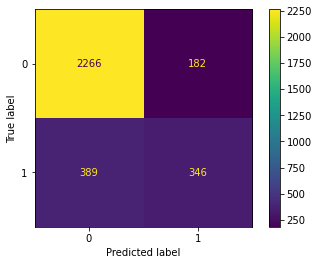

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X6, y_encode, test_size=0.1)
model = LogisticRegression(max_iter=400,C=0.5,fit_intercept=False,penalty='l1',solver='saga')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot();

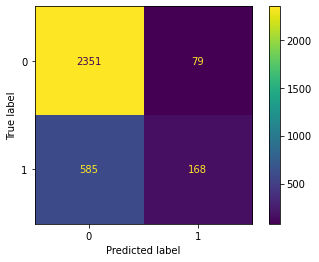

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X6, y_encode, test_size=0.1)
model = SGDClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot();

In [65]:
model = SGDClassifier()
cv_results = cross_validate(model, X6, y_encode,cv=10
                            ,scoring=['accuracy','precision','recall'], return_estimator=True)
print(f"Accuracy : {cv_results['test_accuracy'].mean()}")
print(f"Precision :{cv_results['test_precision'].mean()}")
print(f"Recall :{cv_results['test_recall'].mean()}")

Accuracy : 0.7937339373435203
Precision :0.640278980120548
Recall :0.216820346732711
